In [1]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()



In [ ]:
# run untrained darknet detection for sample image 1
 !./darknet detect cfg/yolov3.cfg yolov3.weights data/glasses001.jpg
 imShow('predictions.jpg')

In [ ]:
# run untrtained darknet detection for sample image 2
 !./darknet detect cfg/yolov3.cfg yolov3.weights data/glasses002.jpg
 imShow('predictions.jpg')

In [ ]:
# run untrtained darknet detection for sample image 2
 !./darknet detect cfg/yolov3.cfg yolov3.weights data/glasses002.jpg
 imShow('predictions.jpg')

In [0]:

# This stops 'Run all' at this cell by causing an error
assert False

AssertionError: ignored

In [0]:
# generate training info for darknet
!python generate_train.py

/content/darknet
/content/darknet


In [0]:
# BEGIN TRAINING. -dont_show flag stops loss chart from displaying (can cause Colab to crash)
!./darknet detector train data/obj.data cfg/yolov3-custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.864272, GIOU: 0.860029), Class: 0.993243, Obj: 0.688268, No Obj: 0.000832, .5R: 1.000000, .75R: 1.000000, count: 3, class_loss = 0.347288, iou_loss = 0.161006, total_loss = 0.508294 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000005, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000230, iou_loss = 0.000000, total_loss = 0.000230 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000048, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000020, iou_loss = 0.000000, total_loss = 0.000020 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.844740, GIOU: 0.840187), Class: 0.999849, Obj: 0.948875, No Obj: 0.001081, .5R: 1.000000, .75R: 1.000000, count: 3,

In [0]:
imShow('chart.png')

In [0]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show

In [0]:
# go into cfg folder to set custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3-custom.cfg
%cd ..


/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 750, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64

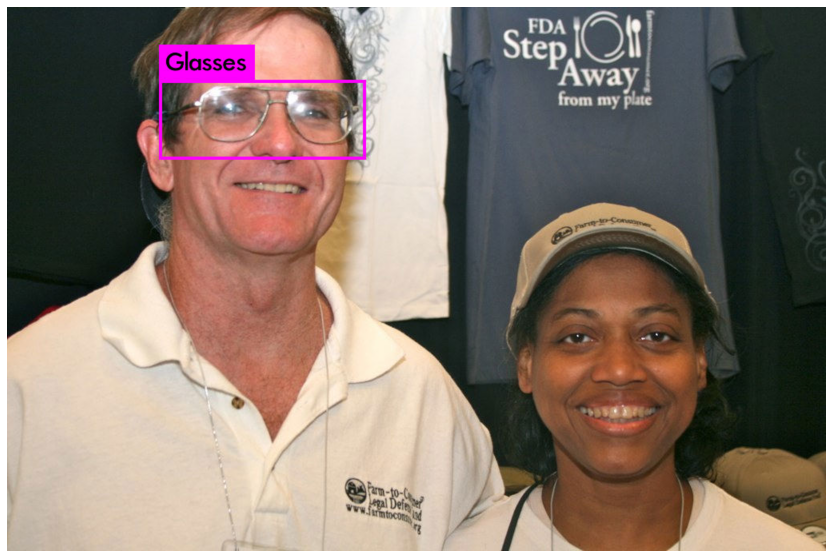

In [0]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg backup/yolov3-custom_last.weights data/glasses006.jpg -thresh 0.3
imShow('predictions.jpg')